In [1]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import glob
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image
import imgaug.augmenters as iaa
from imgaug import parameters as iap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('The IQ-OTHNCCD lung cancer dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (1).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (10).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (100).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (101).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (102).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (103).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (104).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (105).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (106).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (107).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (108).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (109).jpg
The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (11).jpg
The IQ-OTHNCCD lung can

In [2]:
data_dir = "The IQ-OTHNCCD lung cancer dataset/"
label_dirs = ['Bengin cases', 'Malignant cases', 'Normal cases']
# # out_dir = '/kaggle/working'
# out_dir = '/kaggle/working/'

In [3]:
train_ratio = 0.5
val_ratio = 0.25
test_ratio = 0.25

In [4]:
label_dirs

['Bengin cases', 'Malignant cases', 'Normal cases']

In [5]:
import shutil

for label in label_dirs:
    img_paths = glob.glob(os.path.join(data_dir, label, "*.jpg"))

    
    random_seed = 42  

    
    train_paths, rest_paths = train_test_split(img_paths, train_size=train_ratio, random_state=random_seed)
    val_paths, test_paths = train_test_split(rest_paths, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=random_seed)


In [6]:
# train, val,test direction
train_dir = '/kaggle/working/train/'
test_dir = '/kaggle/working/test/'
val_dir = '/kaggle/working/val/'

In [7]:
len(train_dir)

22

In [8]:
image_size = 512
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size = batch_size,
                                                                 shuffle = True)
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               image_size=(image_size, image_size),
                                                               batch_size = batch_size,
                                                               shuffle = False) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=(image_size, image_size),
                                                               batch_size = batch_size,
                                                               shuffle = False) 

Found 548 files belonging to 3 classes.
Found 274 files belonging to 3 classes.
Found 275 files belonging to 3 classes.


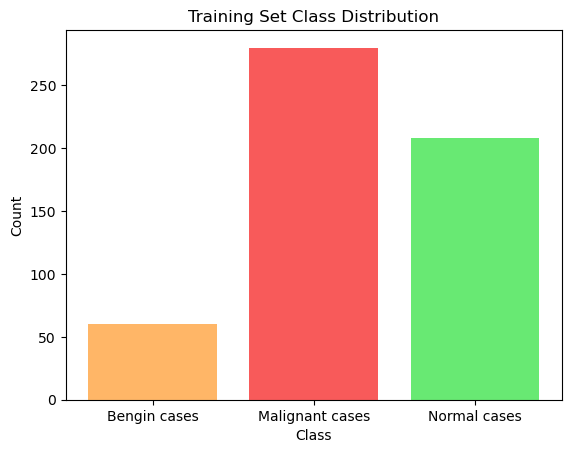

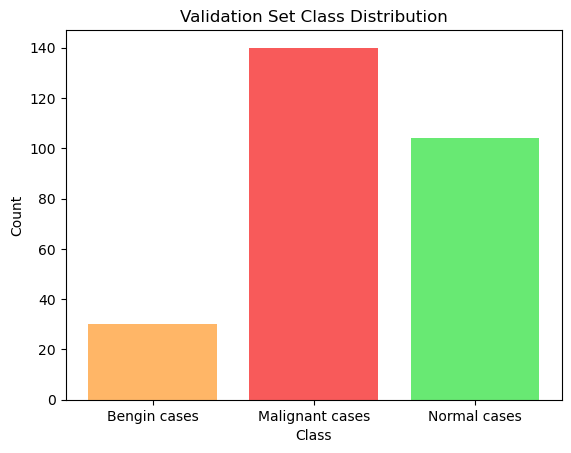

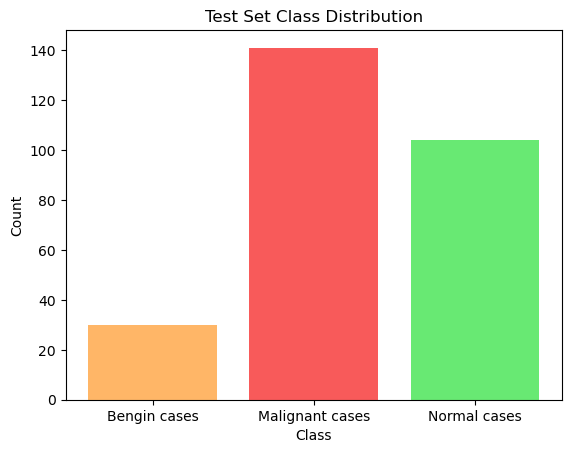

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot bar chart for class distribution
def plot_class_distribution(dataset, title , c = ['#FFB667', '#F85A5A', '#68E973']):
    class_names = dataset.class_names

    # Concatenate labels from batches and convert to numpy array
    all_labels = np.concatenate([labels.numpy() for _, labels in dataset], axis=0)

    class_counts = [np.sum(all_labels == i) for i in range(len(class_names))]


    
   
    plt.bar(class_names, class_counts , color =c)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Plot class distribution for the training set
plot_class_distribution(train_data, title='Training Set Class Distribution')

# Plot class distribution for the validation set
plot_class_distribution(val_data, title='Validation Set Class Distribution')

# Plot class distribution for the test set
plot_class_distribution(test_data, title='Test Set Class Distribution')



In [10]:
#  train data size
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 512, 3)
(32,)


In [11]:
class_names = train_data.class_names
print(class_names)

['Bengin cases', 'Malignant cases', 'Normal cases']


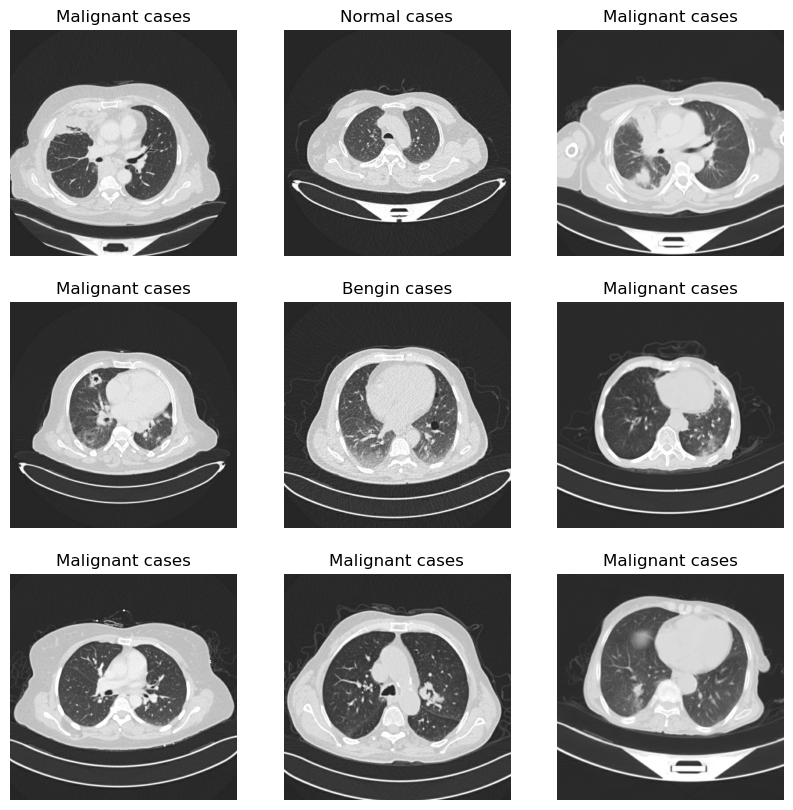

In [12]:
plt.figure(figsize = (10,10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [13]:
image_batch

<tf.Tensor: shape=(32, 512, 512, 3), dtype=float32, numpy=
array([[[[38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.],
         ...,
         [38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.]],

        [[38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.],
         ...,
         [38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.]],

        [[38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.],
         ...,
         [38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.]],

        ...,

        [[38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.],
         ...,
         [38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.]],

        [[38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.],
         ...,
         [38., 38., 38.],
         [38., 38., 38.],
         [38., 38., 38.]],

        [[38., 38., 38.],
         [38., 38., 38.],
         [38., 

In [14]:
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

25.0 255.0


In [15]:
def standard(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1   # Between -1 to 1
    return image, label

In [16]:
train = train_data.map(standard)
validation = val_data.map(standard)

In [17]:
for normal_batch, train_label in train:
  print(normal_batch.shape)
  print(train_label.shape)
  break

(32, 512, 512, 3)
(32,)


In [18]:
train_label
for val_batch, val_label in validation:
  print(normal_batch.shape)
  print(train_label.shape)
  break

(32, 512, 512, 3)
(32,)


In [19]:
# max, min 
# -1, +1
normal_image = normal_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(normal_image), np.max(normal_image))

-0.8509804 1.0


In [20]:
val_image = val_batch[0]
print(np.min(val_image), np.max(val_image))

-1.0 1.0


In [21]:
from tensorflow.keras.models import load_model

In [ ]:
# simple cnn model

import tensorflow as tf
from tensorflow.keras import layers, models

image_size = 512
batch_size = 32
IMG_SHAPE = (image_size, image_size, 3)
n_classes = 9

Simple CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = IMG_SHAPE),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

])

# LSTM Model
lstm_model = models.Sequential([
    layers.Reshape((-1, 64)),  # Adjust the shape based on the output size of the CNN part
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
])

# Combine CNN and LSTM models
combined_model = models.Sequential([
    cnn_model,
    lstm_model,
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model
combined_model.build((batch_size, image_size, image_size, 3))

In [ ]:
# densenet
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
image_size = 512
batch_size = 32
# CHANNELS = 3
IMG_SHAPE = (image_size, image_size, 3)
n_classes = 9



# Create a DenseNet model
densenet_model = DenseNet121(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# LSTM Model (unchanged)
lstm_model = models.Sequential([
    layers.Reshape((-1, 1024)),  # Adjust the shape based on the output size of the DenseNet
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
])

# Combine DenseNet and LSTM models (unchanged)
combined_model = models.Sequential([
    densenet_model,
    lstm_model,
    layers.Dense(n_classes, activation='softmax'),
])

# Compile the combined model with the desired optimizer, loss function, and metrics (unchanged)
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# lenet_model.build((BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
# lstm_model.build((BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
combined_model.build((batch_size, image_size, image_size, 3))




In [22]:
model_1 = load_model("simpleAndLSTM.h5")

In [23]:
model_2 = load_model("denseNetAndLSTM.h5")

In [25]:
# model_3= load_model("com_LeNet&lstm.h5")

In [24]:
test = test_data.map(standard)


In [25]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128)               130075712 
                                                                 
 sequential_1 (Sequential)   (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 130,125,705
Trainable params: 130,125,705
Non-trainable params: 0
_________________________________________________________________


In [28]:
result = model_1.evaluate(test)
print("Test loss, Test accuracy : ", result)

9/9 [==============================] - 164s 10s/step - loss: 0.2781 - accuracy: 0.9382
Test loss, Test accuracy :  [0.2780517637729645, 0.9381818175315857]


In [29]:
result = model_2.evaluate(test)
print("Test loss, Test accuracy : ", result)

9/9 [==============================] - 310s 27s/step - loss: 0.2969 - accuracy: 0.8764
Test loss, Test accuracy :  [0.2968771755695343, 0.8763636350631714]


In [26]:
import pickle

# Specify the new folder path
# new_folder_path = '/finalcode/'

# Load the pickled file from the new folder
file_path = os.path.join( 'denseNetAndLSTM.pk')

with open(file_path, 'rb') as file:
    history_2 = pickle.load(file)


In [27]:
import pickle

# Specify the new folder path
new_folder_path = '/finalcode/'

# Load the pickled file from the new folder
file_path = os.path.join( 'simpleAndLSTM.pk')

with open(file_path, 'rb') as file:
    history_3 = pickle.load(file)


In [35]:
# !pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# !pip install mplcursors


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<IPython.core.display.Javascript object>


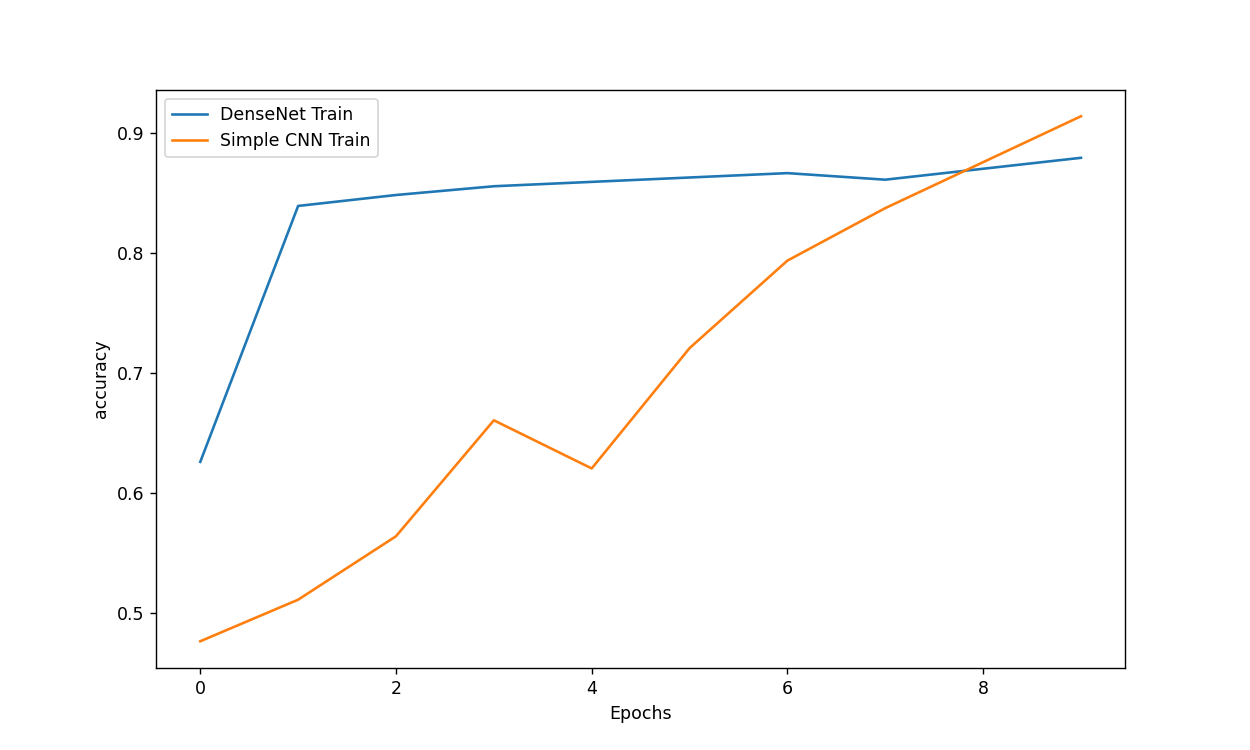

In [58]:

import matplotlib.pyplot as plt
# import mplcursors

# Enable interactive plotting in Jupyter Notebook
%matplotlib notebook
def plot_graphs(histories, metric):
    plt.figure(figsize=(10, 6))

    model_names = ['DenseNet', 'Simple CNN']

    for i, history in enumerate(histories):
        if isinstance(history, dict):
            history_data = history
        else:
            history_data = history.history

        plt.plot(history_data[metric], label=f'{model_names[i]} Train')
       # plt.plot(history_data['val_'+ metric], '--', label=f'{model_names[i]} Validation')

    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    
#     mplcursors.cursor(hover=True)
    plt.show()

# Assuming you have three history objects: history_1, history_2, and history_3
plot_graphs([history_2, history_3], 'accuracy')


<IPython.core.display.Javascript object>


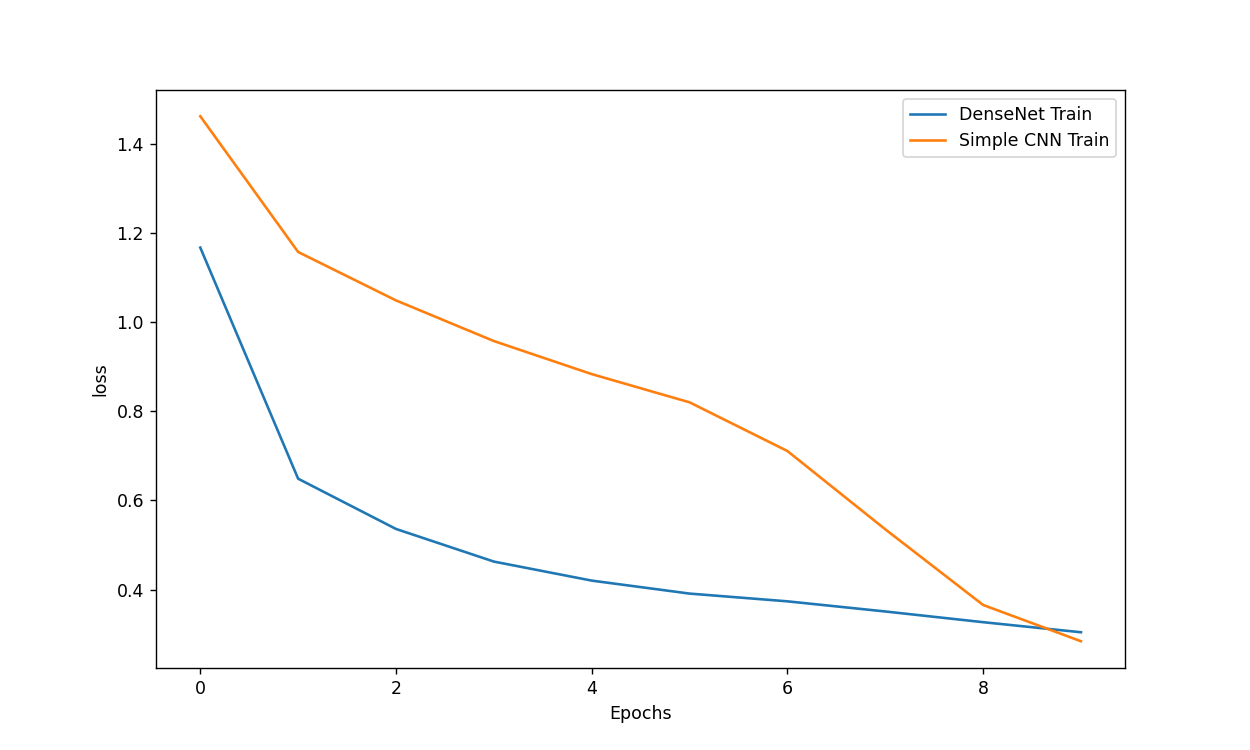

In [57]:

import matplotlib.pyplot as plt
# import mplcursors

# Enable interactive plotting in Jupyter Notebook
%matplotlib notebook
def plot_graphs(histories, metric):
    plt.figure(figsize=(10, 6))

    model_names = [ 'DenseNet', 'Simple CNN']

    for i, history in enumerate(histories):
        if isinstance(history, dict):
            history_data = history
        else:
            history_data = history.history

        plt.plot(history_data[metric], label=f'{model_names[i]} Train')
       # plt.plot(history_data['val_'+ metric], '--', label=f'{model_names[i]} Validation')

    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    
#     mplcursors.cursor(hover=True)
    plt.show()

# Assuming you have three history objects: history_1, history_2, and history_3
plot_graphs([history_2, history_3], 'loss')

In [28]:
# %matplotlib notebook
def plot_graphs(history, metric):
    if isinstance(history ,dict):
        history_data = history
    else:
        history_data = history.history
    plt.plot(history_data[metric])
    plt.plot(history_data['val_'+ metric], '')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric , 'val_'+ metric])
    plt.show()


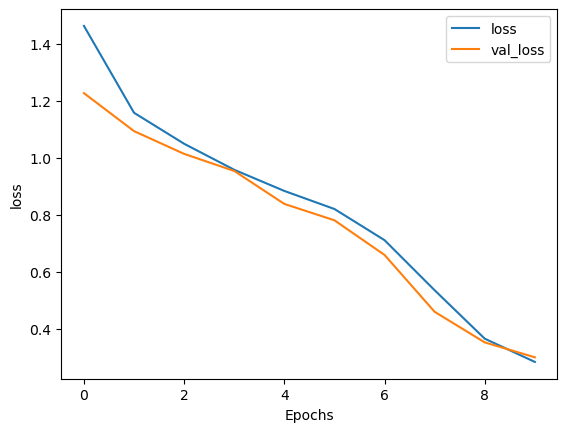

In [29]:
# Example usage
plot_graphs(history_3, 'loss')


In [28]:
# %matplotlib notebook
def plot_graphs(history, metric):
    if isinstance(history ,dict):
        history_data = history
    else:
        history_data = history.history
    plt.plot(history_data[metric])
    plt.plot(history_data['val_'+ metric], '')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric , 'val_'+ metric])
    plt.show()


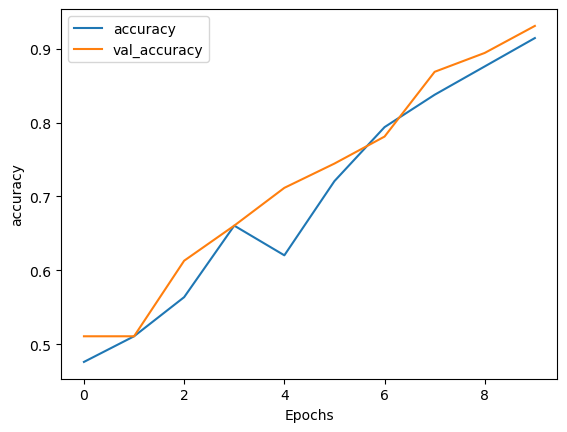

In [29]:
plot_graphs(history_3, 'accuracy')

In [59]:
from tensorflow.keras import preprocessing

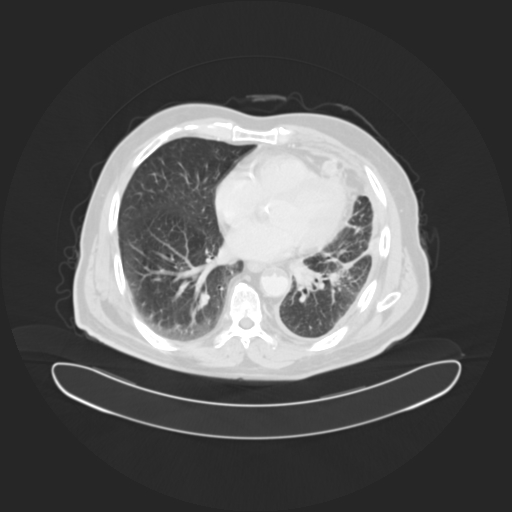

In [60]:
#normal case
image_path ="The IQ-OTHNCCD lung cancer dataset\Malignant cases\Malignant case (1).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)

image

In [61]:
pred = model_1.predict(scaled_img)
output = class_names[np.argmax(pred)]
output

1/1 [==============================] - 12s 12s/step


'Malignant cases'

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Create a list to store the true and predicted labels
true_labels = []
pred_labels = []

# Iterate over the test dataset and make predictions
for images, labels in test:
    predictions = model_1.predict(images)
    pred_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Print the confusion matrix
print(cm)

1/1 [==============================] - 1s 1s/step
[[ 14   0  16]
 [  0 141   0]
 [  0   1 103]]


In [64]:
# !pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 294.6/294.6 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 1.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


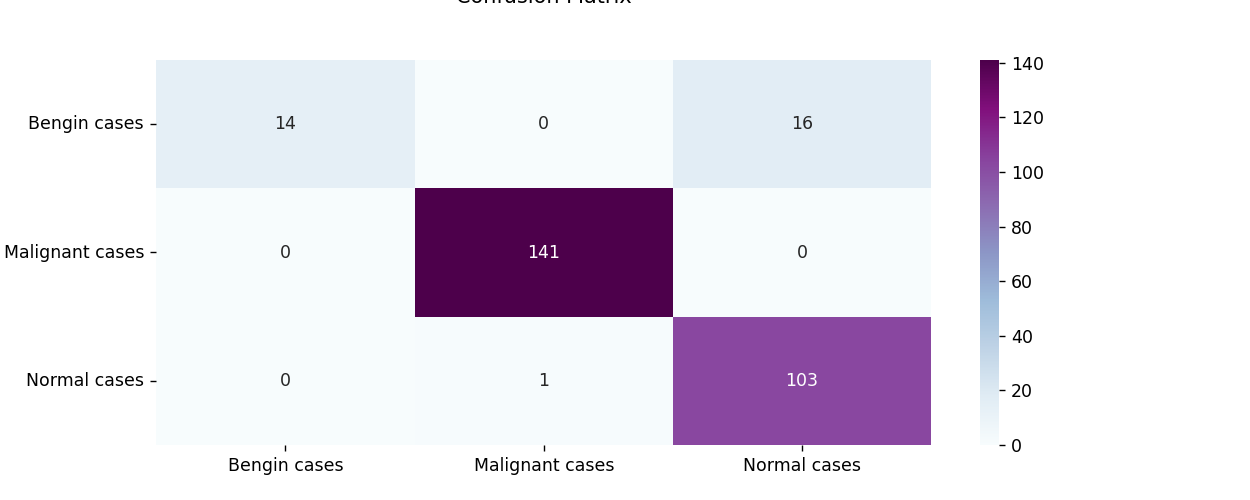

In [69]:
# plt.xticks(range(len(class_names)), class_names, rotation=90)
# plt.yticks(range(len(class_names)), class_names)


import seaborn as sns

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='BuPu',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score,f1_score

# make predictions on test data
y_pred = model_1.predict(test)

# get predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# get true class labels
y_true_labels = np.concatenate([y for x, y in test], axis=0)



# calculate precision and recall scores
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
sensitivity = recall_score(y_true_labels, y_pred_labels, average=None)

# Compute f1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
# Print sensitivity for each class
class_names = ['Benign', 'Malignant', 'Normal']

# sensitivity_per_class = recall_score(y_true_labels, y_pred_labels, average=None)

# And you are printing the sensitivity for each class like this:

for i, sensitivity in enumerate(sensitivity):
    class_name = class_names[i]
    print('Sensitivity ({}) {:.4f}'.format(class_name, sensitivity))



# Print f1 score
print("F1 score: {:.4f}".format(f1))

9/9 [==============================] - 32s 2s/step
Precision: 0.9455
Recall: 0.9382
Sensitivity (Benign) 0.4667
Sensitivity (Malignant) 1.0000
Sensitivity (Normal) 0.9904
F1 score: 0.9297


In [28]:
from sklearn.metrics import classification_report
sensitivity = recall_score(y_true_labels, y_pred_labels, average=None)

# Assuming y_true_labels and y_pred_labels are your true and predicted labels
report = classification_report(y_true_labels, y_pred_labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.47      0.64        30
           1       0.99      1.00      1.00       141
           2       0.87      0.99      0.92       104

    accuracy                           0.94       275
   macro avg       0.95      0.82      0.85       275
weighted avg       0.95      0.94      0.93       275



In [ ]:

# !pip install graphviz 
# !pip install pydot

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(  model1,
#     to_file='sakib_model.png',
#     show_shapes=True,
#    )